In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       100 non-null    int64
 1   OverallQual   100 non-null    int64
 2   YearBuilt     100 non-null    int64
 3   TotalBsmtSF   100 non-null    int64
 4   GrLivArea     100 non-null    int64
 5   FullBath      100 non-null    int64
 6   BedroomAbvGr  100 non-null    int64
 7   KitchenAbvGr  100 non-null    int64
 8   GarageCars    100 non-null    int64
 9   SalePrice     100 non-null    int64
dtypes: int64(10)
memory usage: 7.9 KB
None
            LotArea  OverallQual    YearBuilt  TotalBsmtSF    GrLivArea  \
count    100.000000   100.000000   100.000000   100.000000   100.000000   
mean   10597.630000     5.380000  1963.770000  1215.390000  2316.050000   
std     2742.329238     2.541693    33.529681   446.031138  1043.024491   
min     5240.000000     1.000000  1902.000000   515.000000  

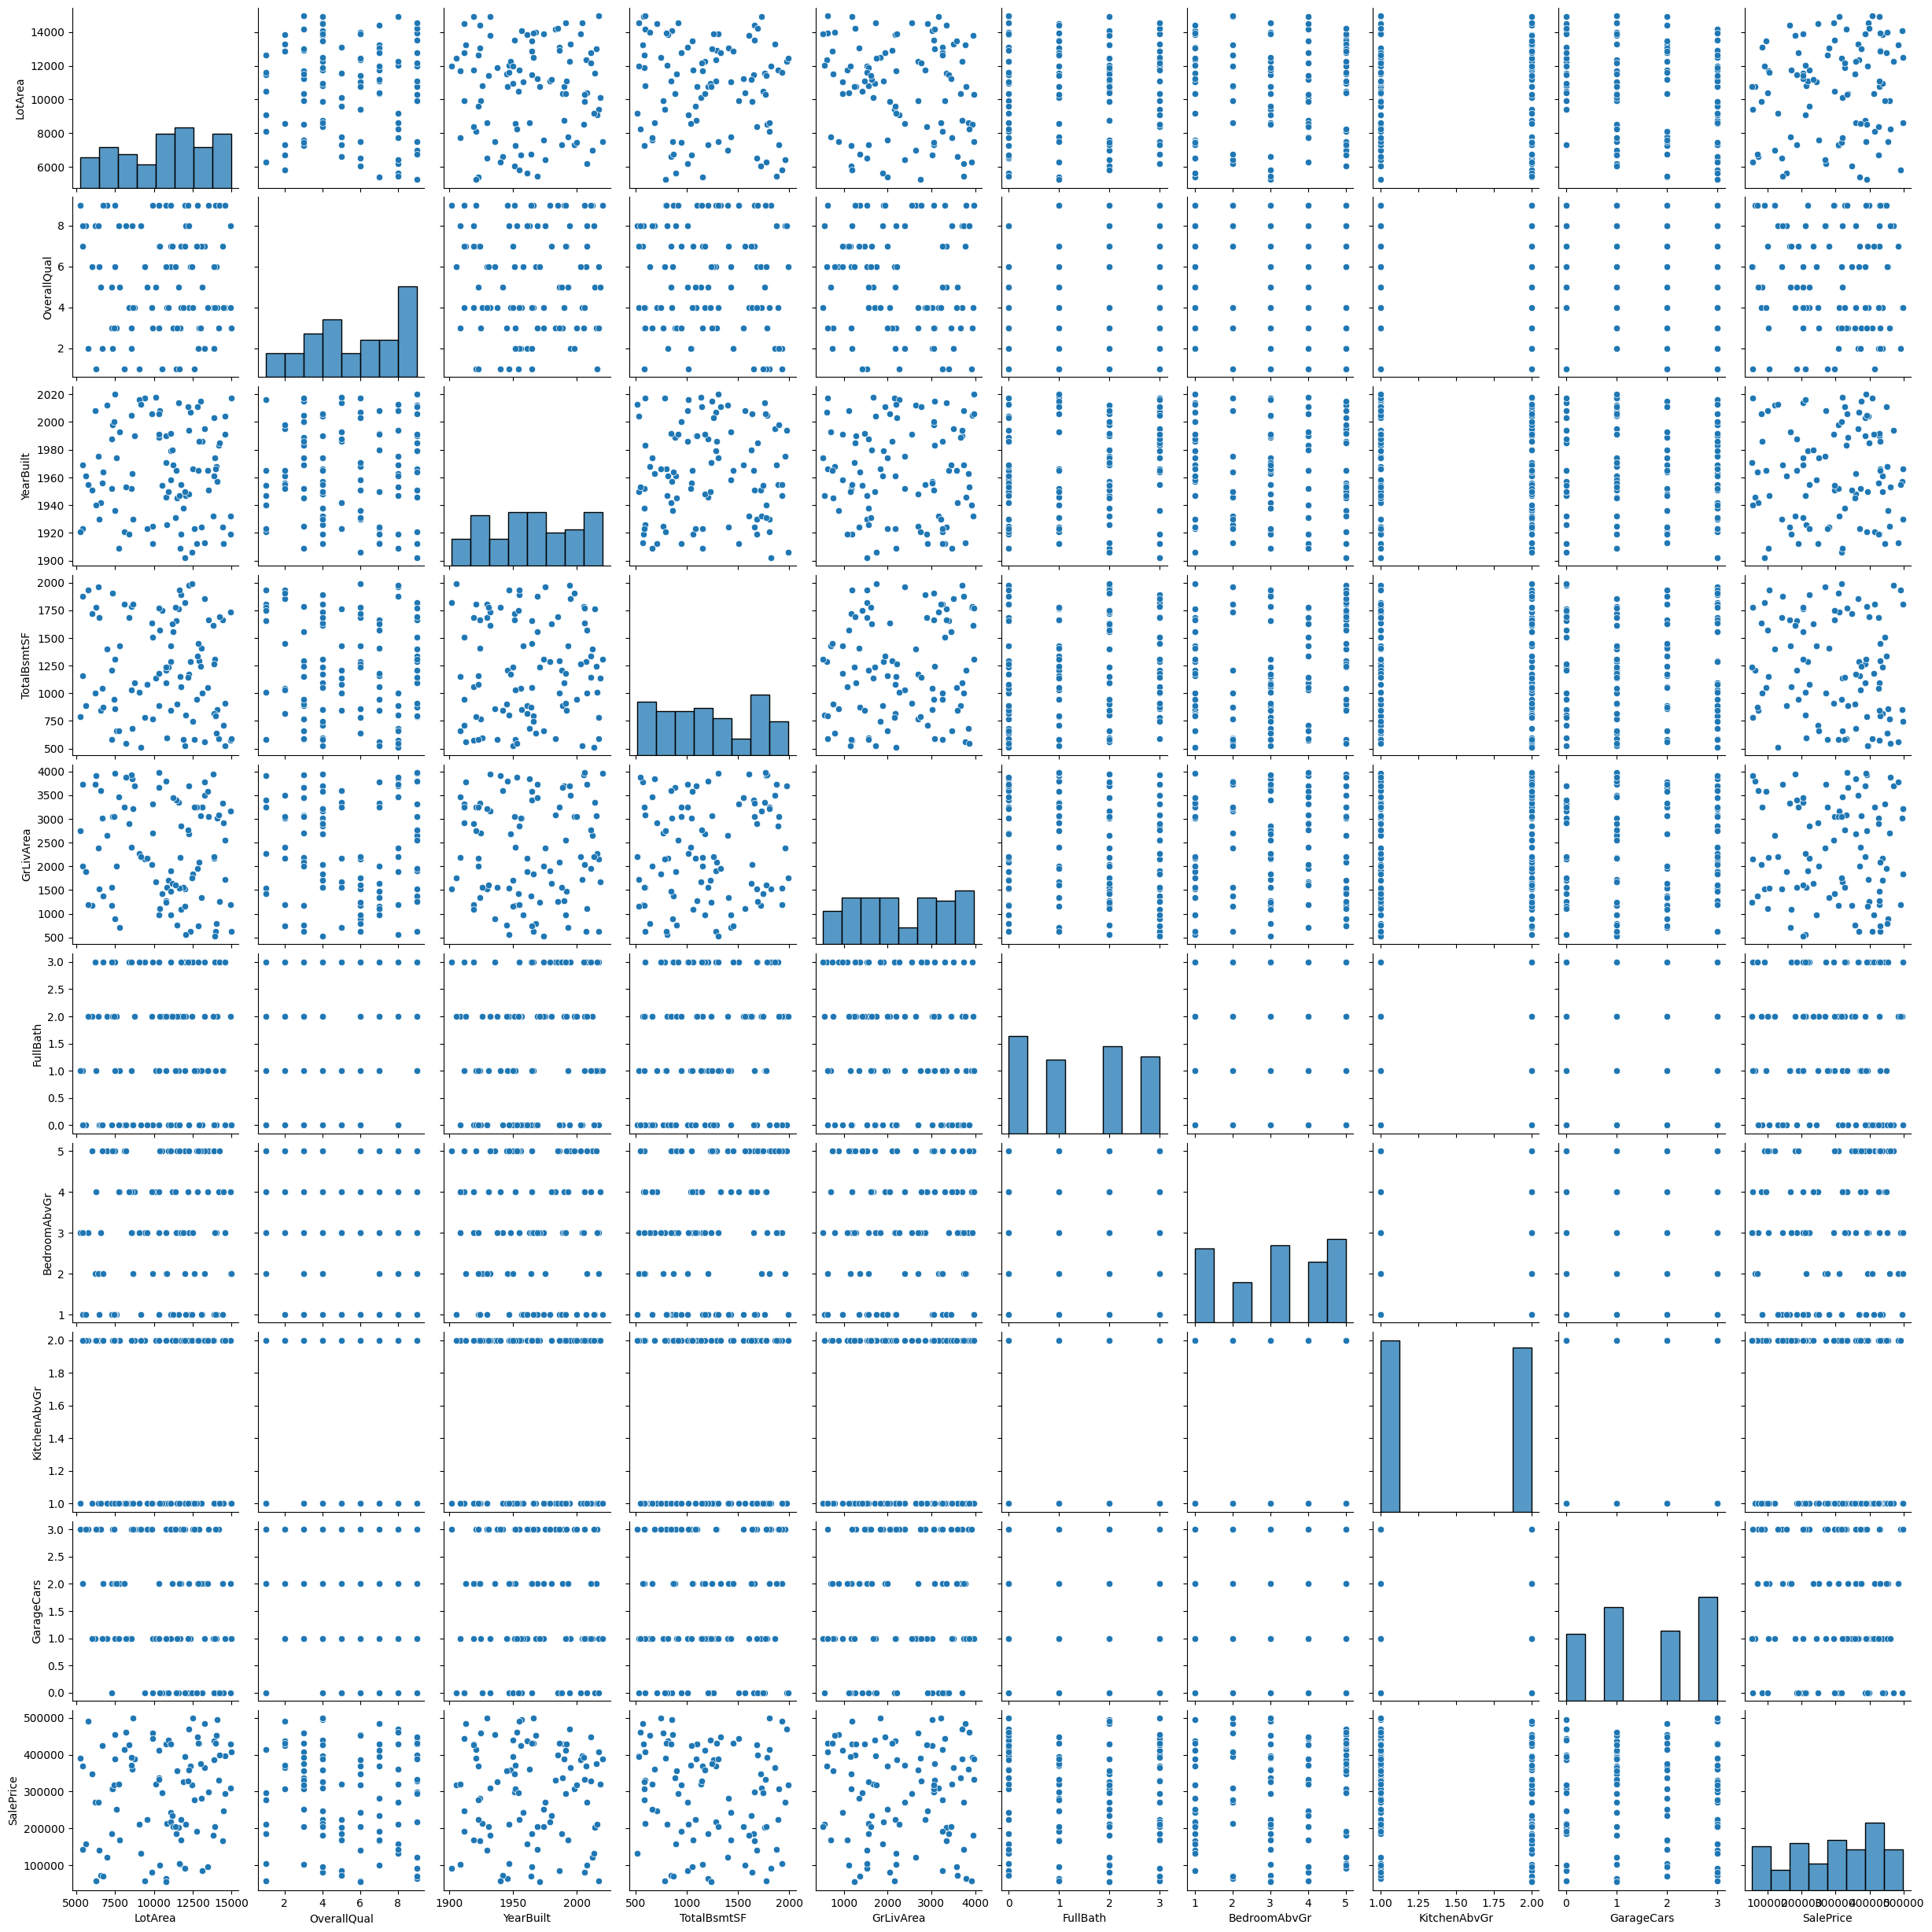

In [4]:
data = pd.read_csv('sample_house_prices.csv')
print(data.info())
print(data.describe())
sns.pairplot(data)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data.fillna(data.mean(), inplace=True)
data = pd.get_dummies(data)

X = data.drop('SalePrice', axis=1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
lr.fit(X_train, y_train)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_lr = lr.predict(X_test)
print(f'Linear Regression MAE: {mean_absolute_error(y_test, y_pred_lr)}')
print(f'Linear Regression RMSE: {mean_squared_error(y_test, y_pred_lr, squared=False)}')

y_pred_rf = rf.predict(X_test)
print(f'Random Forest MAE: {mean_absolute_error(y_test, y_pred_rf)}')
print(f'Random Forest RMSE: {mean_squared_error(y_test, y_pred_rf, squared=False)}')


Linear Regression MAE: 131957.72256985697
Linear Regression RMSE: 150740.0940029951
Random Forest MAE: 125666.71
Random Forest RMSE: 143928.3565240995


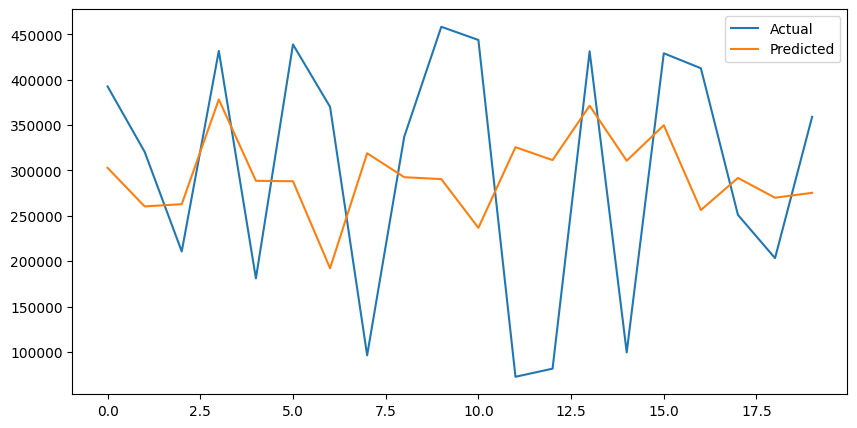

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_rf, label='Predicted')
plt.legend()
plt.show()
